In [1]:
# Avoiding memory leak
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# Initial imports
import pandas as pd
from pathlib import Path

In [3]:
# Import CSV file
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# Drop output column
myopia_df.drop(columns = ["MYOPIC"]).head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
# Create a scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(myopia_df)

In [6]:
# Scale the data
myopia_scaled = scaler.transform(myopia_df)

In [7]:
# Use PCA to reduce the dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components = .90)
myopia_pca = pca.fit_transform(myopia_scaled)

In [8]:
# Further reduce dimensions with TSNE
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate = 200)
myopia_tsne = tsne.fit_transform(myopia_pca)

C:\Users\zachr\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [9]:
# Put data back into a dataframe to plot
reduced_myopia_df = pd.DataFrame(myopia_tsne, columns = ["x", "y"])

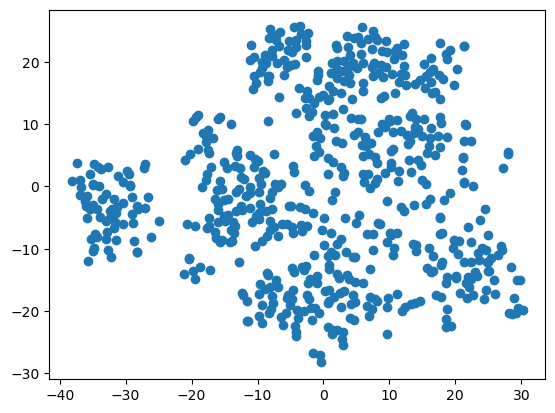

In [10]:
# Create a plot to show potential clusters
import matplotlib.pyplot as plt
plt.scatter(reduced_myopia_df["x"], reduced_myopia_df["y"])
plt.show()

In [15]:
# For loop to populate inertia levels for each k value
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

for item in k:
    km = KMeans(n_clusters = item)
    km.fit(reduced_myopia_df)
    inertia.append(km.inertia_)

In [16]:
# Create a dataframe to store k and inertia values
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

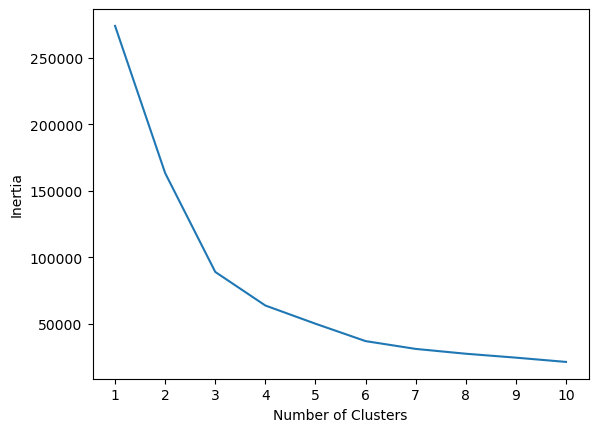

In [17]:
# Plot an elbow to identify the best k value
plt.plot(elbow_df["k"], elbow_df["inertia"])
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [18]:
# Create a kmeans model with the identified best cluster number
kmeans_model = KMeans(n_clusters = 3)

In [20]:
# Fit the model to data
kmeans_model.fit(reduced_myopia_df)

KMeans(n_clusters=3)

In [22]:
# Add the class identifier to the dataframe
reduced_myopia_df["class"] = kmeans_model.labels_

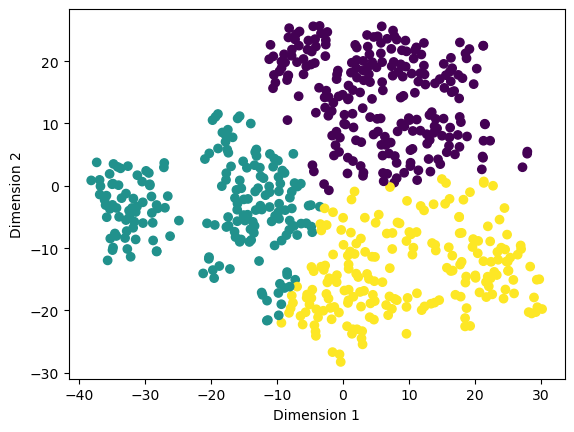

In [24]:
# Recreate the scatterplot to color each cluster
plt.scatter(x = reduced_myopia_df["x"], y = reduced_myopia_df["y"], c = reduced_myopia_df["class"])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

#### Recommendation:
Unfortunately, it is difficult to recommend clustering the patients in this way. These three clusters make it unclear whether there is an obvious trend in myopia predictors, at least among the classifiers in this dataset.